# Spotify

Aquí vamos a escribir la info más básica.

Dataframes: 

df_top_world -> 50 Canciones más oidas del mundo <br>
df_top_spain -> 100 canciones más oidas en España (Dependiendo del contexto usaremos las primeras 50 o las 100)

genres_world -> Géneros de df_top_world <br>
genres_spain -> Géneros de df_top_spain

artists_world -> Artistas de df_top_world <br>
artists_spain -> Artistas de df_top_spain


In [84]:
import pandas as pd
import numpy as np
import json
import requests
import time
import datetime
import math

import matplotlib.pyplot as plt
import seaborn as sb
import squarify

**1 -> CONEXIÓN CON API**

Defino mis constantes

In [85]:
CLIENT_ID = 'b00cc762eb664d2f8fc50e24c09d419b'
CLIENT_SECRET = '1db8591d49634b39aa8949b91b97bb2e'

AUTH_URL = 'https://accounts.spotify.com/api/token' # PARA OBTENER LA AUTORIZACIÓN
BASE_URL = 'https://api.spotify.com/v1/' # PARA LAS CONSULTAS

Guardo las URI que voy a analizar

In [86]:
URI_TOP_WORLD = '37i9dQZF1DX18jTM2l2fJY' # Playlist "Top Tracks 2022"
URI_TOP_SPAIN = 'h37i9dQZF1DXdo9iIZiH7LB'# Playlist "Top Canciones 2022 España"

Obtengo el token de acceso a la API

In [87]:
# POST PARA OBTENER EL TOKEN DE ACCESO
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# CONVIERTO A JSON
auth_response_data = auth_response.json()

# ALMACENO EN LA VARIABLE 
access_token = auth_response_data['access_token']

# LA INCLUYO EN LOS HEADERS EN SU FORMATO ESPECÍFICO.
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

**2 -> OBTENCIÓN DE DATOS**

2.1 -> Top Tracks 2022 (Mundial)

In [91]:
# response_top_world = requests.get(BASE_URL + 'playlists/' + URI_TOP_WORLD + '/tracks/', headers=headers)
response_top_world = requests.get(BASE_URL + 'playlists/' + URI_TOP_SPAIN + '/tracks/', headers=headers)
top_world_tracks = response_top_world.json()

In [92]:
top_world_tracks['items'][0]['track']['album']['artists'][0]['name']

KeyError: 'items'

In [ ]:
# EXTRAIGO TODAS LAS CANCIONES DE LA PLAYLIST
index_tracks = []
columns=['Ranking', 'Region', 'Track_Name', 'Track_ID', 'Track_Main_Artist', 'Album_Name', 'Album_ID']

# VOY ITERANDO EL RANKING
ranking = 1

for track in top_world_tracks['items']:

    region = 'WORLD'

    track_name = track['track']['name']
    track_id = track['track']['id']
  
    album_name = track['track']['album']['name']
    album_id = track['track']['album']['id']

    main_artist = track['track']['album']['artists'][0]['name']

    # MONTO LA LISTA DE ESE REGISTRO Y LA INSERTO EN EL CONJUNTO
    track_list = [ranking, region, track_name, track_id, main_artist, album_name,album_id]
    index_tracks.append(track_list)

    # SUMO AL RANKING PARA LA SIGUIENTE VUELTA
    ranking += 1


# MONTO EL DATAFRAME BASE
df_top_world = pd.DataFrame(index_tracks, columns=columns)
df_top_world

,Ranking,Region,Track_Name,Track_ID,Track_Main_Artist,Album_Name,Album_ID
0,1,WORLD,As It Was,4LRPiXqCikLlN15c3yImP7,Harry Styles,As It Was,2pqdSWeJVsXAhHFuVLzuA8
1,2,WORLD,Heat Waves,02MWAaffLxlfxAUY7c5dvx,Glass Animals,Dreamland (+ Bonus Levels),0KTj6k94XZh0c6IEMfxeWV
2,3,WORLD,STAY (with Justin Bieber),5HCyWlXZPP0y6Gqq8TgA20,The Kid LAROI,STAY (with Justin Bieber),4QLAtpLNUsHEYrcHXmMIZZ
3,4,WORLD,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny,Un Verano Sin Ti,3RQQmkQEvNCY4prGKE6oc5
4,5,WORLD,Tití Me Preguntó,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,3RQQmkQEvNCY4prGKE6oc5
5,6,WORLD,Cold Heart - PNAU Remix,6zSpb8dQRaw0M1dK8PBwQz,Elton John,Cold Heart (PNAU Remix),5D8Rdb09BkmHscEGSWAlA6
6,7,WORLD,Enemy (with JID) - from the series Arcane Leag...,1r9xUipOqoNwggBpENDsvJ,Imagine Dragons,Enemy (with JID) [from the series Arcane Leagu...,1bTgKomQYSkKYPD9UI9W4b
7,8,WORLD,"Quevedo: Bzrp Music Sessions, Vol. 52",2tTmW7RDtMQtBk7m2rYeSw,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",4PNqWiJAfjj32hVvlchV5u
8,9,WORLD,Ojitos Lindos,3k3NWokhRRkEPhCzPmV8TW,Bad Bunny,Un Verano Sin Ti,3RQQmkQEvNCY4prGKE6oc5
9,10,WORLD,Running Up That Hill (A Deal With God) - 2018 ...,29d0nY7TzCoi22XBqDQkiP,Kate Bush,Hounds of Love (2018 Remaster),3OYnManu1Nlxnw9OMng7BH


In [ ]:
# SACO LA INFO COMPLEMENTARIA DE CADA TRACK:
additional_info = []

columns=['Track_ID', 'Release_Date', 'Track_Popularity', 'ISRC']

for song in df_top_world['Track_ID']:
     # song ES EL ID DE LA CANCIÓN.
    response_song = requests.get(BASE_URL + 'tracks/' + song, headers=headers)
    info_song = response_song.json()
    track_popularity = info_song['popularity']
    release_date = info_song['album']['release_date']
    isrc = info_song['external_ids']['isrc']

    additional_info_list = [song, release_date, track_popularity, isrc]
    additional_info.append(additional_info_list)

# MONTO EL DATAFRAME DE INFO COMPLEMENTARIA
df_additional_info_world = pd.DataFrame(additional_info, columns=columns)
df_additional_info_world

,Track_ID,Release_Date,Track_Popularity,ISRC
0,4LRPiXqCikLlN15c3yImP7,2022-03-31,93,USSM12200612
1,02MWAaffLxlfxAUY7c5dvx,2020-08-06,87,GBUM72000433
2,5HCyWlXZPP0y6Gqq8TgA20,2021-07-09,87,USSM12103949
3,6Sq7ltF9Qa7SNFBsV5Cogx,2022-05-06,95,QM6MZ2214877
4,1IHWl5LamUGEuP4ozKQSXZ,2022-05-06,94,QM6MZ2214878
5,6zSpb8dQRaw0M1dK8PBwQz,2021-08-13,86,GBUM72104705
6,1r9xUipOqoNwggBpENDsvJ,2021-10-28,85,USUM72119916
7,2tTmW7RDtMQtBk7m2rYeSw,2022-07-06,96,UYB282201028
8,3k3NWokhRRkEPhCzPmV8TW,2022-05-06,93,QM6MZ2214888
9,29d0nY7TzCoi22XBqDQkiP,1985-09-16,80,GBAYE1800884


In [ ]:
# SACO LA LA INFO DE ANÁLISIS
analysis_info = []

columns=['Track_ID', 'Duracion_MS', 'Duracion', 'Loudness_dB', 'Clave', 'Modo', 'Tempo_BPM', 'Compas', 'Danceability', 'Energy', 'Speechiness', 'Instrumentalness', 'Acousticness', 'Liveness', 'Valence']

for song in df_top_world['Track_ID']:

    # song ES EL ID DE LA CANCIÓN.
    response_features= requests.get(BASE_URL + 'audio-features/' + song , headers=headers)
    features = response_features.json()

    # TODOS LOS DATOS SE EXPLICAN EN LA MEMORIA / PRESENTACION

    # DATOS TECNICOS:
    duration_ms = features['duration_ms']
    loudness_db = features['loudness']
    key = features['key']
    mode = features['mode']
    tempo_bpm = features['tempo']
    time_signature = features['time_signature']

    # ANALISIS DE LA IA
    danceability = features['danceability']
    energy = features['energy']
    speechiness = features['speechiness']
    instrumentalness = features['instrumentalness']
    acousticness = features['acousticness']
    liveness = features['liveness']
    valence = features['valence']

    analysis_info_list = [song, duration_ms, 0, loudness_db, key, mode, tempo_bpm, time_signature, danceability, energy, speechiness, instrumentalness, acousticness, liveness, valence]
    analysis_info.append(analysis_info_list)

# MONTO EL DATAFRAME DE ANALISIS
df_analysis_info_world = pd.DataFrame(analysis_info, columns=columns)

# PARSEO LA DURACIÓN A MM:SS
df_analysis_info_world['Duracion'] = df_analysis_info_world['Duracion_MS'].apply(lambda x: str(datetime.timedelta(milliseconds=x)))
df_analysis_info_world

,Track_ID,Duracion_MS,Duracion,Loudness_dB,Clave,Modo,Tempo_BPM,Compas,Danceability,Energy,Speechiness,Instrumentalness,Acousticness,Liveness,Valence
0,4LRPiXqCikLlN15c3yImP7,167303,0:02:47.303000,-5.338,6,0,173.930,4,0.520,0.731,0.0557,0.001010,0.34200,0.3110,0.6620
1,02MWAaffLxlfxAUY7c5dvx,238805,0:03:58.805000,-6.900,11,1,80.870,4,0.761,0.525,0.0944,0.000007,0.44000,0.0921,0.5310
2,5HCyWlXZPP0y6Gqq8TgA20,141806,0:02:21.806000,-5.484,1,1,169.928,4,0.591,0.764,0.0483,0.000000,0.03830,0.1030,0.4780
3,6Sq7ltF9Qa7SNFBsV5Cogx,178567,0:02:58.567000,-5.105,1,0,92.005,4,0.911,0.712,0.0817,0.000027,0.09010,0.0933,0.4250
4,1IHWl5LamUGEuP4ozKQSXZ,243717,0:04:03.717000,-5.198,5,0,106.672,4,0.650,0.715,0.2530,0.000291,0.09930,0.1260,0.1870
5,6zSpb8dQRaw0M1dK8PBwQz,202735,0:03:22.735000,-6.312,1,1,116.032,4,0.796,0.798,0.0317,0.000042,0.03400,0.0952,0.9420
6,1r9xUipOqoNwggBpENDsvJ,173381,0:02:53.381000,-4.424,11,0,77.011,4,0.728,0.783,0.2660,0.000000,0.23700,0.4340,0.5550
7,2tTmW7RDtMQtBk7m2rYeSw,198938,0:03:18.938000,-5.548,2,1,128.033,4,0.621,0.782,0.0440,0.033000,0.01250,0.2300,0.5500
8,3k3NWokhRRkEPhCzPmV8TW,258299,0:04:18.299000,-5.745,3,0,79.928,4,0.647,0.686,0.0413,0.000001,0.08000,0.5280,0.2680
9,29d0nY7TzCoi22XBqDQkiP,300840,0:05:00.840000,-11.903,10,0,108.296,4,0.625,0.533,0.0596,0.002660,0.65900,0.0546,0.1390


In [ ]:
# SACO LA INFO DE TODOS LOS ARTISTAS DE LAS CANCIONES PASANDO LOS ID'S
track_by_artist_info = []
columns=['Track_ID', 'Track_Main_Artist', 'Track_Main_Artist_ID', 'Track_Featured_Artist', 'Track_Featured_Artist_ID', 'Track_Popularity']

for song in df_top_world['Track_ID']:

    # song ES EL ID DE LA CANCIÓN.
    response_song = requests.get(BASE_URL + 'tracks/' + song, headers=headers)
    info_song = response_song.json()

    # HAY CANCIONES CON MÁS DE UN ARTISTA
    # VAMOS A GENERAR UN REGISTRO POR ARTISTA, PARA PODER CRUZAR CON SUS POPULARIDADES Y GÉNEROS
    num_artists = len(info_song['artists'])

    # DATOS COMUNES
    track_main_artist = info_song['artists'][0]['name']
    track_main_artist_id = info_song['artists'][0]['id']
    track_popularity = info_song['popularity']

    for i in info_song['artists']:
        track_featured_artist =  i['name']
        track_featured_artist_id = i['id']
        track_info_list = [song, track_main_artist, track_main_artist_id, track_featured_artist, track_featured_artist_id, track_popularity]
        track_by_artist_info.append(track_info_list)

# MONTO EL DATAFRAME
df_track_by_artist_world = pd.DataFrame(track_by_artist_info, columns=columns)
df_track_by_artist_world

,Track_ID,Track_Main_Artist,Track_Main_Artist_ID,Track_Featured_Artist,Track_Featured_Artist_ID,Track_Popularity
0,4LRPiXqCikLlN15c3yImP7,Harry Styles,6KImCVD70vtIoJWnq6nGn3,Harry Styles,6KImCVD70vtIoJWnq6nGn3,93
1,02MWAaffLxlfxAUY7c5dvx,Glass Animals,4yvcSjfu4PC0CYQyLy4wSq,Glass Animals,4yvcSjfu4PC0CYQyLy4wSq,87
2,5HCyWlXZPP0y6Gqq8TgA20,The Kid LAROI,2tIP7SsRs7vjIcLrU85W8J,The Kid LAROI,2tIP7SsRs7vjIcLrU85W8J,87
3,5HCyWlXZPP0y6Gqq8TgA20,The Kid LAROI,2tIP7SsRs7vjIcLrU85W8J,Justin Bieber,1uNFoZAHBGtllmzznpCI3s,87
4,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny,4q3ewBCX7sLwd24euuV69X,Bad Bunny,4q3ewBCX7sLwd24euuV69X,95
...,...,...,...,...,...,...
65,4gzsuuZypVbxs0Af1LSZyB,Tainy,0GM7qgcRCORpGnfcN2tCiB,Bad Bunny,4q3ewBCX7sLwd24euuV69X,86
66,4gzsuuZypVbxs0Af1LSZyB,Tainy,0GM7qgcRCORpGnfcN2tCiB,Julieta Venegas,2QWIScpFDNxmS6ZEMIUvgm,86
67,2JPLbjOn0wPCngEot2STUS,Bad Bunny,4q3ewBCX7sLwd24euuV69X,Bad Bunny,4q3ewBCX7sLwd24euuV69X,88
68,41oY4WCTj5kccfesTVFnvN,Bad Bunny,4q3ewBCX7sLwd24euuV69X,Bad Bunny,4q3ewBCX7sLwd24euuV69X,88


In [ ]:
# DE AQUI VOY A SACAR UNA LISTA CON TODOS LOS ARTISTAS

list_artists = df_track_by_artist_world['Track_Main_Artist_ID'].unique()

columns = ['Artist_ID', 'Artist', 'Followers_Spotify', 'Genres_List', 'Artist_Popularity']
artist_info = []

# CON ESTO SACO POPULARIDAD, SEGUIDORES Y GENEROS DE CADA ARTISTA

for artist in list_artists:
    response_artist = requests.get(BASE_URL + 'artists/' + artist, headers=headers)
    info_artist = response_artist.json()


    name = info_artist['name']
    followers = info_artist['followers']['total']
    genres = info_artist['genres']
    popularity = info_artist['popularity']

    artist_info_list = [artist, name, followers, genres, popularity]
    artist_info.append(artist_info_list)


# MONTO EL DATAFRAME
df_artist_info_world = pd.DataFrame(artist_info, columns=columns)
df_artist_info_world

,Artist_ID,Artist,Followers_Spotify,Genres_List,Artist_Popularity
0,6KImCVD70vtIoJWnq6nGn3,Harry Styles,25217110,[pop],90
1,4yvcSjfu4PC0CYQyLy4wSq,Glass Animals,3562121,"[gauze pop, indietronica, shiver pop]",79
2,2tIP7SsRs7vjIcLrU85W8J,The Kid LAROI,4155066,"[australian hip hop, pop]",82
3,4q3ewBCX7sLwd24euuV69X,Bad Bunny,61834877,"[reggaeton, trap latino, urbano latino]",100
4,3PhoLpVuITZKcymswpck5b,Elton John,10673163,"[glam rock, mellow gold, piano rock]",86
5,53XhwfbYqKCa1cC15pYq2q,Imagine Dragons,44423788,"[modern rock, rock]",89
6,716NhGYqD1jl2wI1Qkgq36,Bizarrap,8295772,"[argentine hip hop, pop venezolano, trap argen...",86
7,1aSxMhuvixZ8h9dK9jIDwL,Kate Bush,1587505,"[art pop, art rock, baroque pop, new wave pop,...",74
8,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,12191404,"[lgbtq+ hip hop, pop]",83
9,2VSHKHBTiXWplO8lxcnUC9,GAYLE,549801,[modern alternative pop],70


Text(0.5, 1.0, 'Presencia de géneros en la playlist "Top Tracks 2022"')

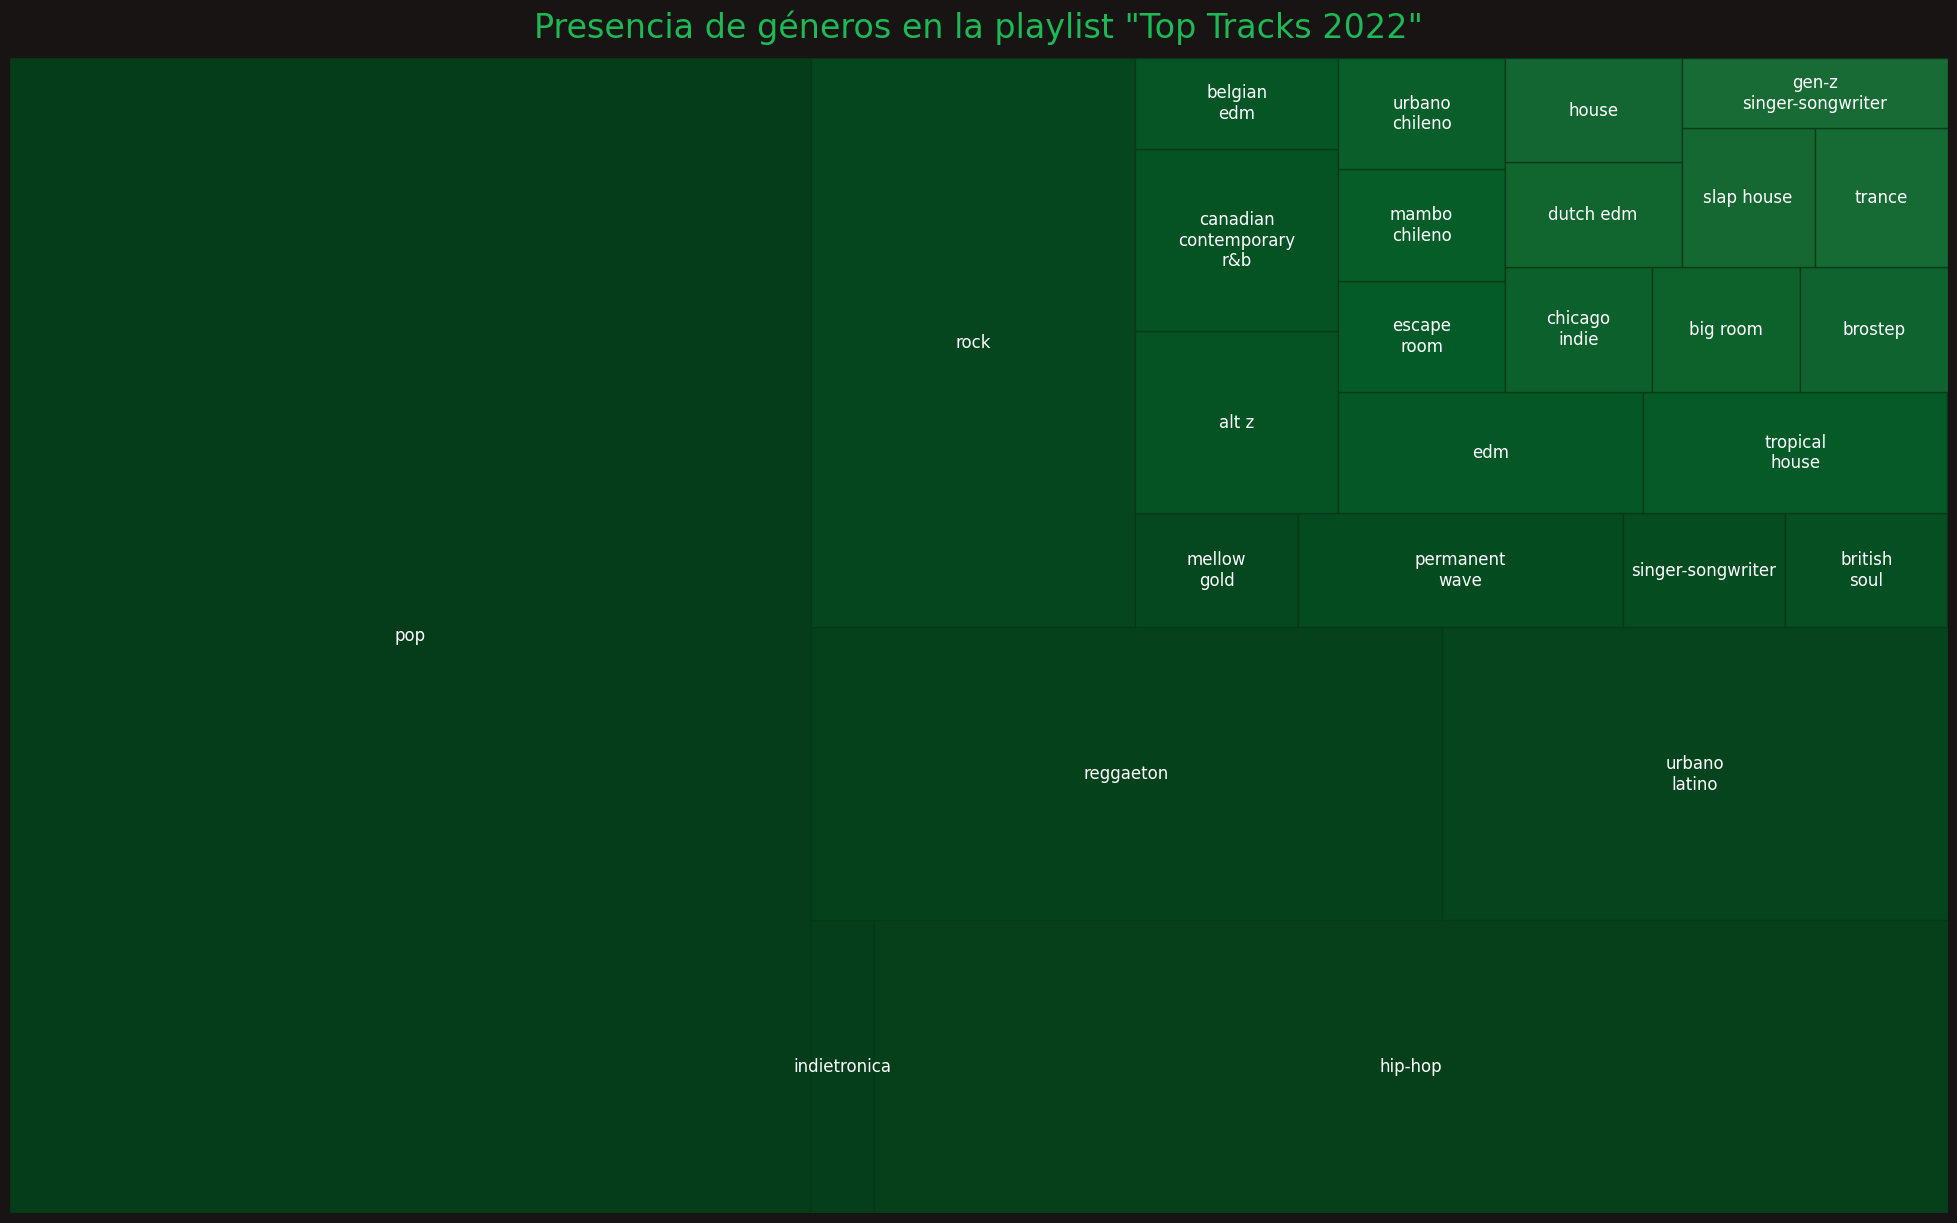

In [ ]:
# SACO LOS ESTILOS PARA UN TREEMAP
df_artist_info_world['Genres_List']
genres = []

# ME QUEDO CON TODOS LOS ESTILOS INDEPENDIENTES DE LAS LISTAS
for i in df_artist_info_world['Genres_List']:
    for genre in i:

        # FORMATEO ALGUNOS GÉNEROS
        if 'gen z' in genre:
            genre = genre.replace('gen z', 'gen-z')
 
        # AGRUPO TODOS LOS SIMILARES
        if 'hip hop' in genre:
            genre = 'hip-hop'


        # ESTO ES POR PROBAR AUN
        if 'rap' in genre:
            genre = 'hip-hop'

        if 'reggaeton' in genre:
            genre = 'reggaeton'

        if 'pop' in genre:
            genre = 'pop'

        if 'trap' in genre:
            genre = 'trap'

        if 'rock' in genre:
            genre = 'rock'

        # SI TIENE MÁS DE 10 CARACTERES, METO SALTO DE LÍNEA
        if len(genre) > 10:
            genre = genre.replace(' ', '\n')

        genres.append(genre)

# CREO LA CUENTA PARA LOS TAMAÑOS
genre_count = {}

for genre in genres:
    if genre in genre_count:
        genre_count[genre] += 1
    else:
        genre_count[genre] = 1

# DEFINO LOS TAMAÑOS SEGUN EL METODO DE SQUARIFY
sizes = [genre_count[genre] for genre in genre_count]

# SQUARIFY
fig = plt.figure(figsize=(25, 15))
fig.patch.set_facecolor('#191414') # FONDO DEL GRÁFICO
plt.axis("off")
squarify.plot(
    sizes=sizes, 
    label=genre_count.keys(), 
    color=sb.color_palette("Greens_r", len(genres)),
    ec = '#093618', # BORDES DE LOS CUADROS
    text_kwargs = {'fontsize': 12, 'color': 'white'},
    alpha = 0.8,
    )
plt.title('Presencia de géneros en la playlist "Top Tracks 2022"', fontsize=24, color = '#1DB954', pad=15)


Pendiente: 

sacar todos los estilos

cruzar con rrss?